In [1]:
import pickle
import plot
import numpy as np
from matplotlib import pyplot as plt

load Feature Vectors

In [2]:
import glob

In [3]:
folder    = "../saves/"
file_paths = glob.glob(folder + "*")

In [12]:
file_paths

['../saves\\Giovanni_Francesco_Romanelli_-_The_Finding_of_Moses_-_Google_Art_Project.jpg0.1.pkl',
 '../saves\\Giovanni_Francesco_Romanelli_-_The_Finding_of_Moses_-_Google_Art_Project.jpg0.2.pkl',
 '../saves\\Giovanni_Francesco_Romanelli_-_The_Finding_of_Moses_-_Google_Art_Project.jpg0.3.pkl',
 '../saves\\Giovanni_Francesco_Romanelli_-_The_Finding_of_Moses_-_Google_Art_Project.jpg0.4.pkl',
 '../saves\\Giovanni_Francesco_Romanelli_-_The_Finding_of_Moses_-_Google_Art_Project.jpg0.5.pkl',
 '../saves\\Giovanni_Francesco_Romanelli_-_The_Finding_of_Moses_-_Google_Art_Project.jpg0.6.pkl',
 '../saves\\Giovanni_Francesco_Romanelli_-_The_Finding_of_Moses_-_Google_Art_Project.jpg0.7.pkl',
 '../saves\\Giovanni_Francesco_Romanelli_-_The_Finding_of_Moses_-_Google_Art_Project.jpg0.8.pkl',
 '../saves\\Giovanni_Francesco_Romanelli_-_The_Finding_of_Moses_-_Google_Art_Project.jpg0.9.pkl',
 '../saves\\Giovanni_Francesco_Romanelli_-_The_Finding_of_Moses_-_Google_Art_Project.jpg1.pkl']

In [4]:
features = []
for file_path in file_paths:
    with open(file_path, 'rb') as input:
        features.append(pickle.load(input))

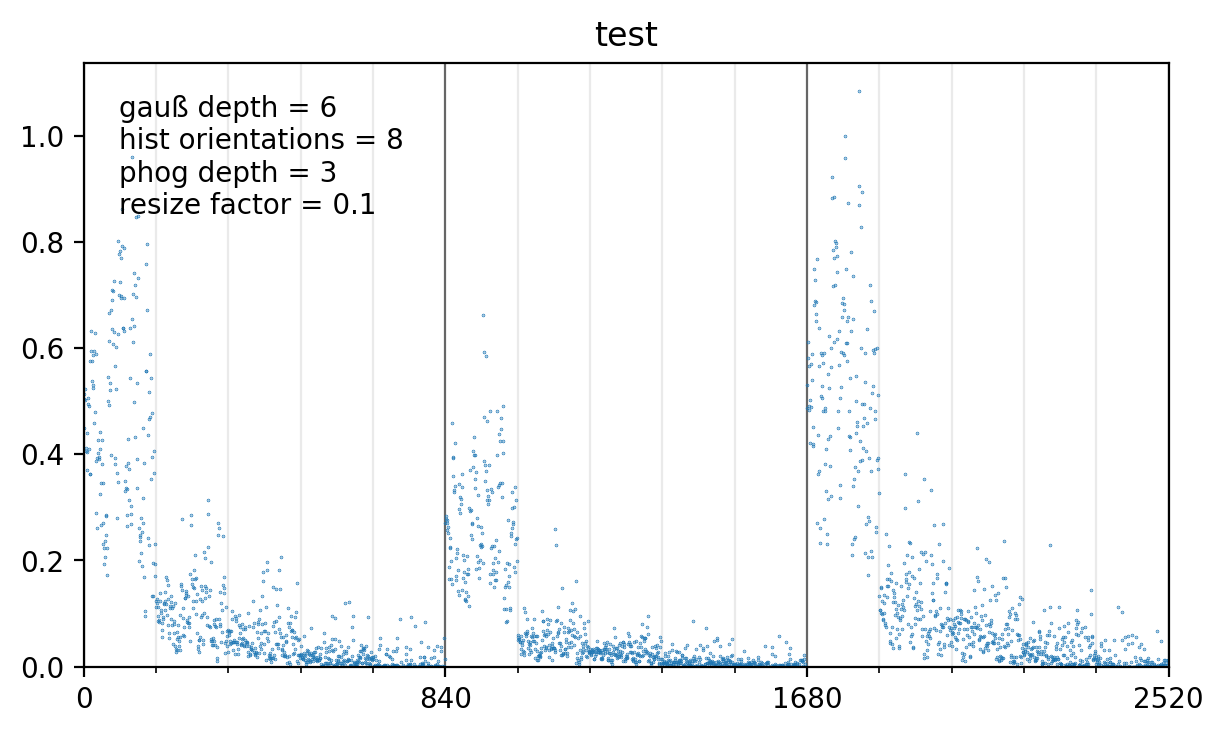

In [5]:
feature = features[0]
plot.plot_vector(vector=feature[1], name="test", parameter=feature[0])

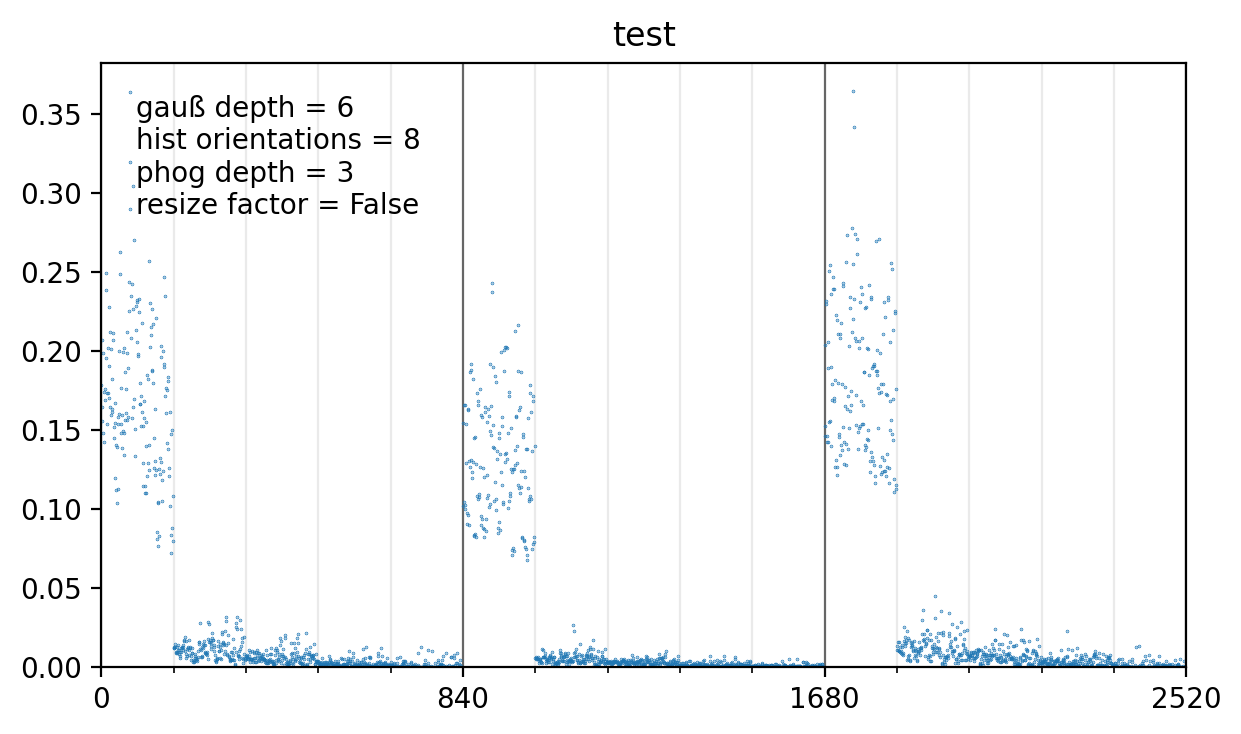

In [6]:
feature = features[-1]
plot.plot_vector(vector=feature[1], name="test", parameter=feature[0])

In [7]:
normals = []

for f in features:

    vector = f[1]

    normal = np.concatenate([v / v.max() for v in np.split(vector, 5*3)])
    normals.append(normal)

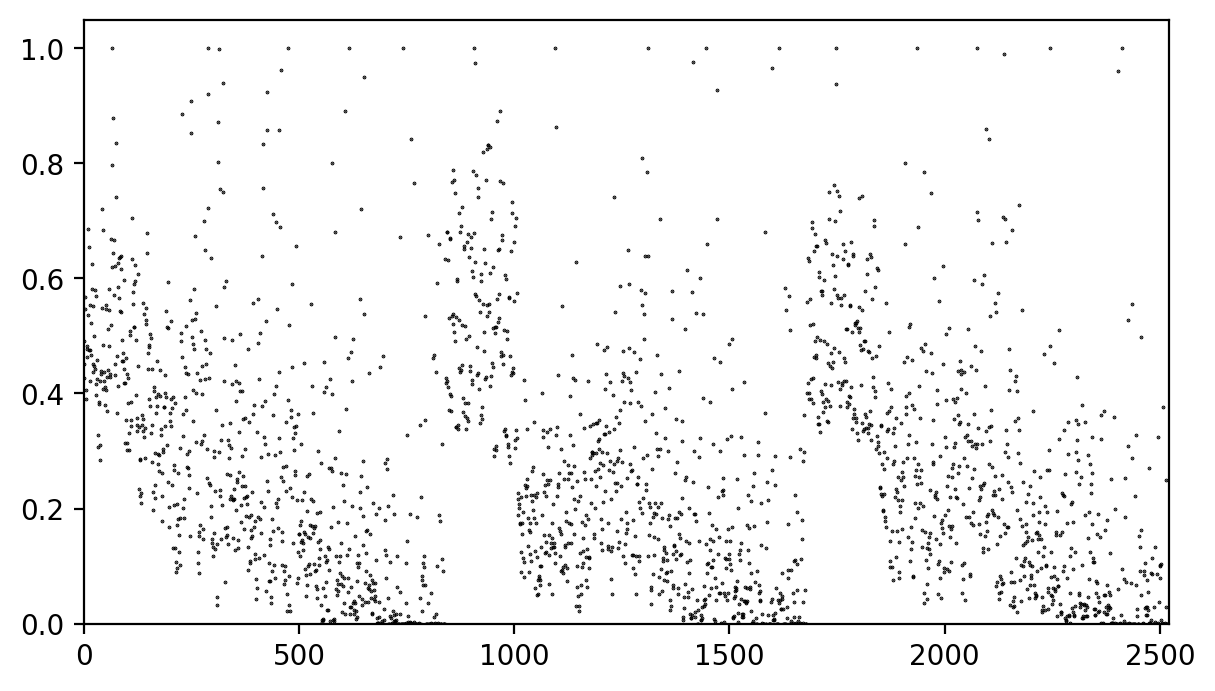

In [16]:
plot.testplot(normals[-1])

In [58]:
def plot_difference(normals, xlim):
    x = [i for i in range(normals[0].size)]
    y = normals[-1]
    fig, ax = plt.subplots(figsize=(7, 4), dpi=200)
    ax.set_ylim(0)
    ax.set_xlim(xlim)

    for idx, normal in enumerate(normals):
        y = normal
        ax.scatter(x, y, marker='.', s=0.5, c='red', alpha=(1+idx)/len(normals))

    y = normals[-1]
    ax.scatter(x, y, marker='.', s=0.7, c='black')

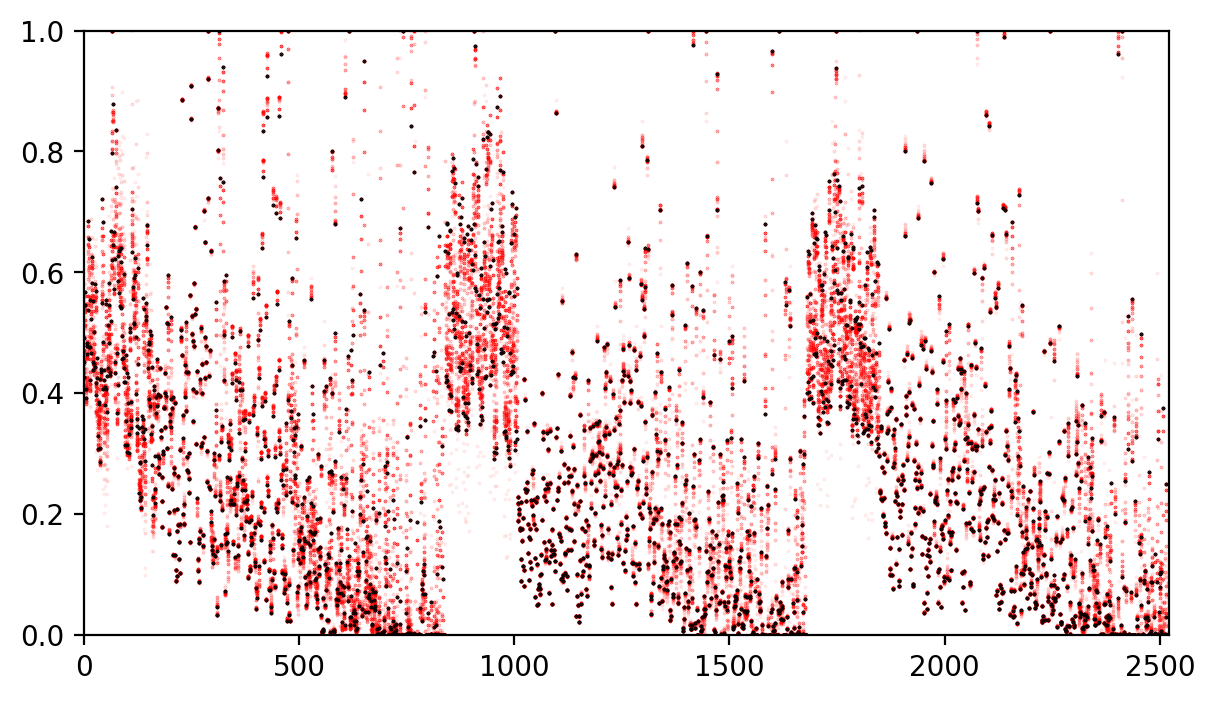

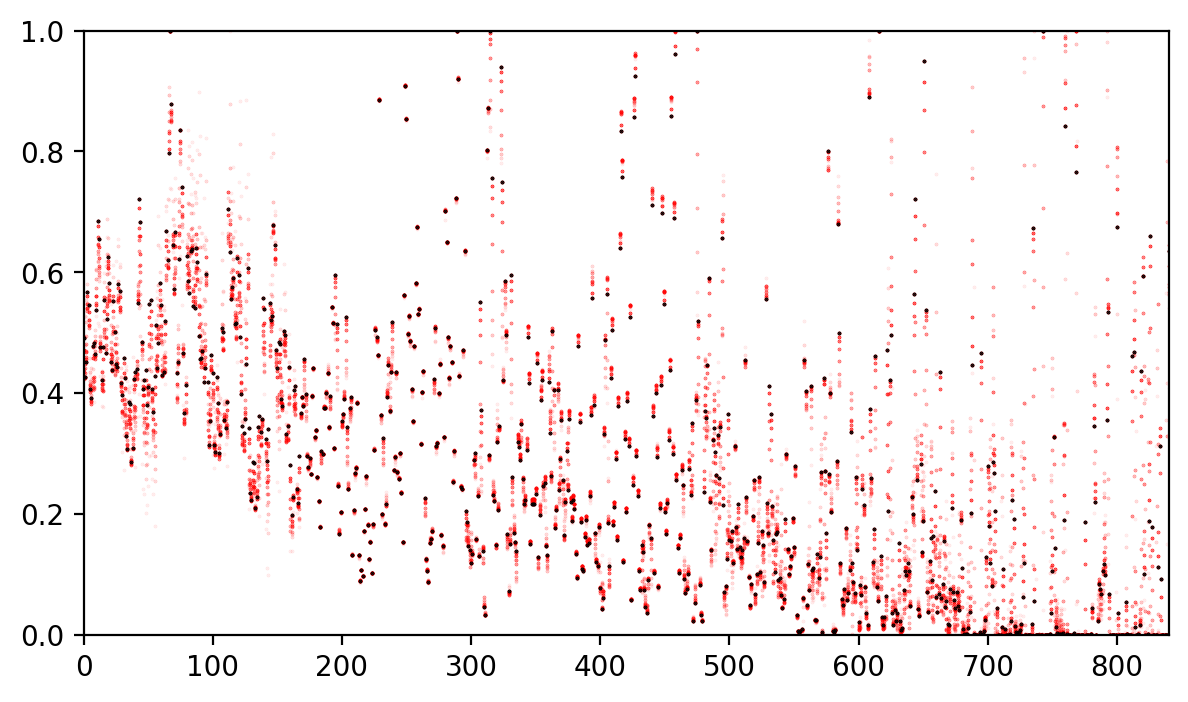

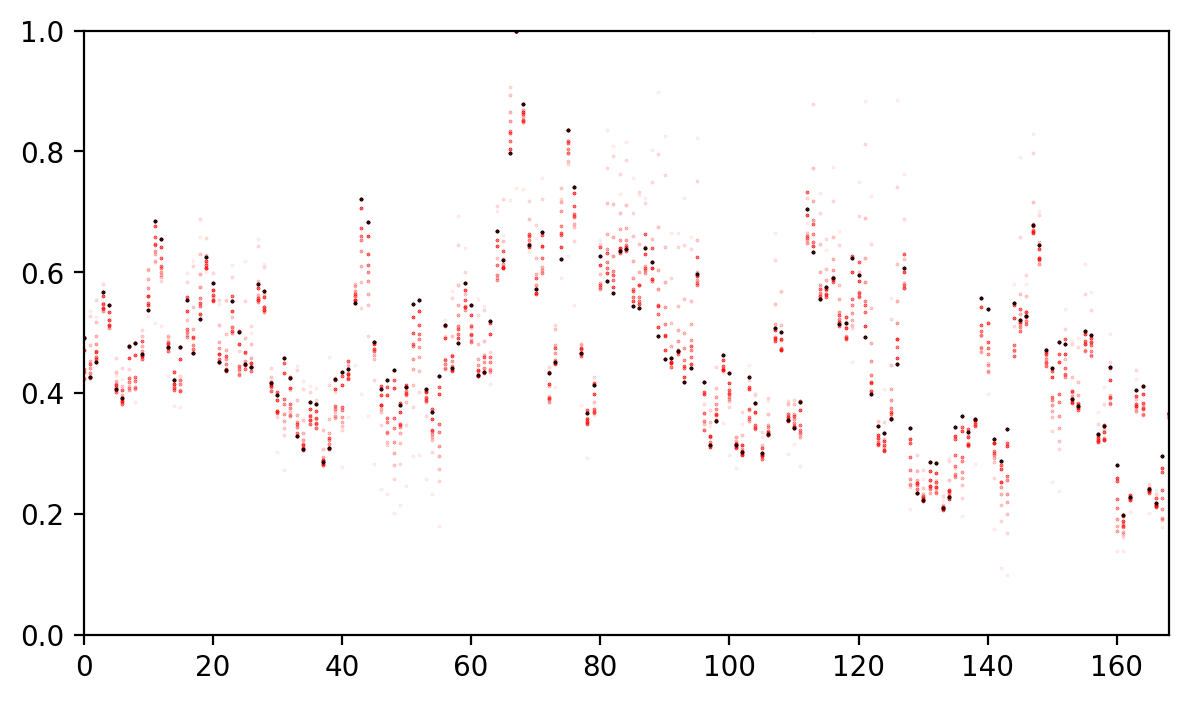

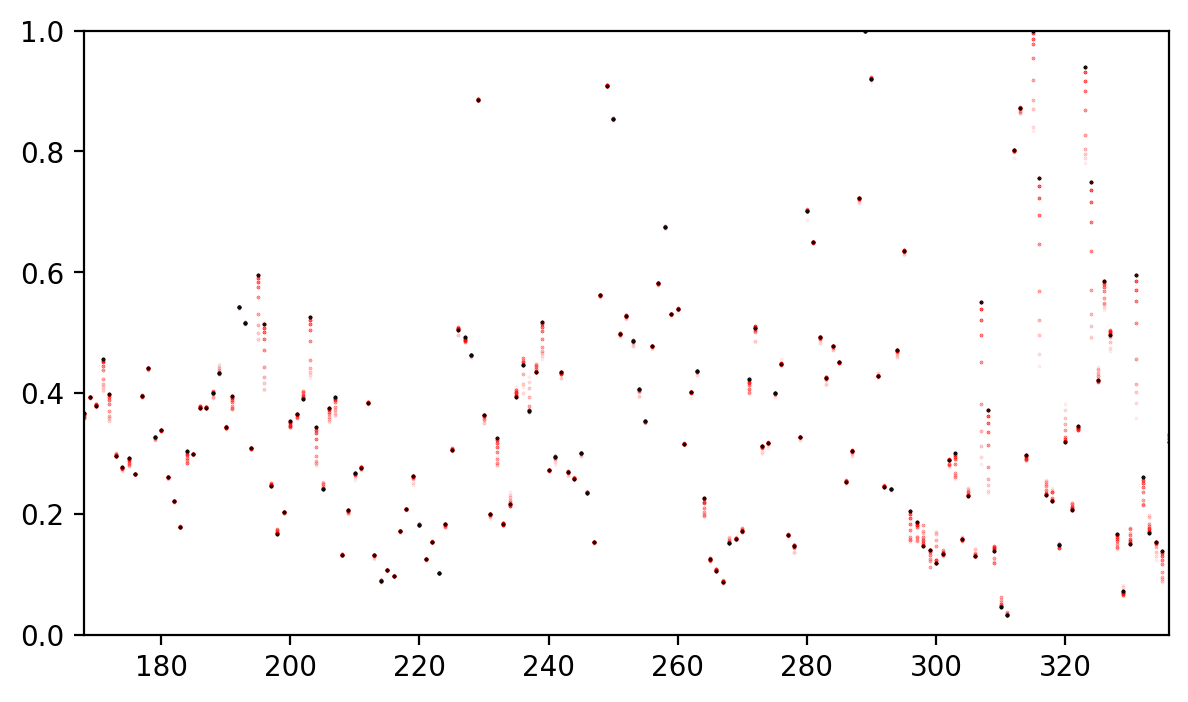

In [70]:
plot_difference(normals, (0, normals[0].size//(1)));
plot_difference(normals, (0, normals[0].size//(3)));
plot_difference(normals, (0, normals[0].size//(3*5)));
plot_difference(normals, (normals[0].size//(3*5),   normals[0].size//(3*5) * 2 ));

In [78]:
diffs = [normals[-1] - n for n in normals]

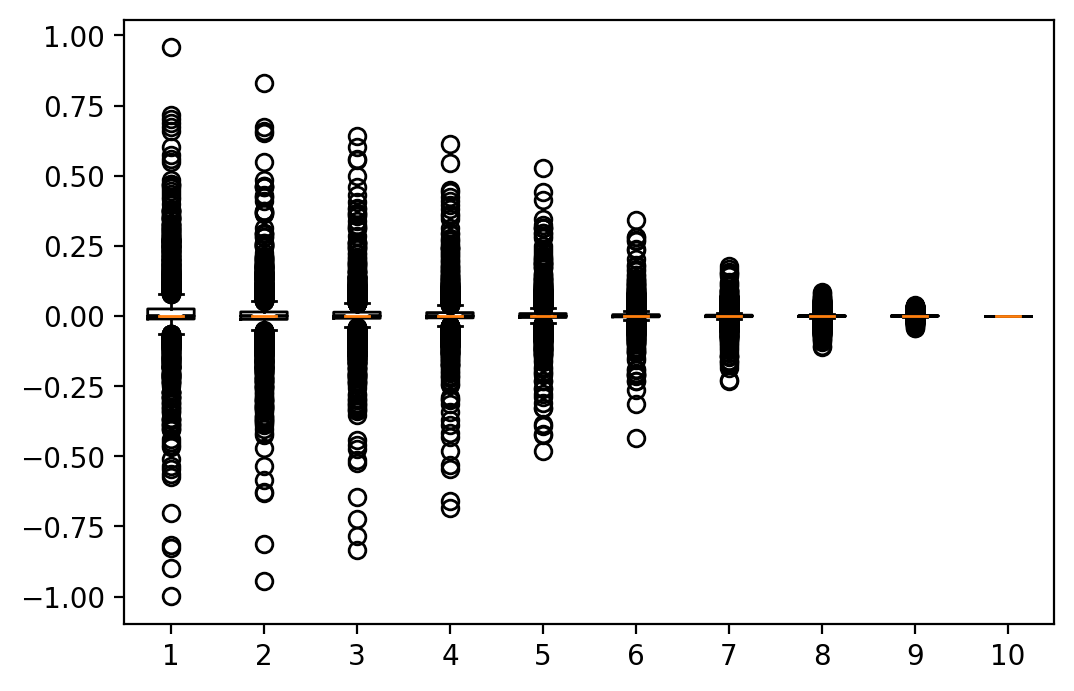

In [79]:
fig, ax = plt.subplots(dpi=200)
ax.boxplot(diffs, vert=True, autorange=True, notch=True, showfliers=True);

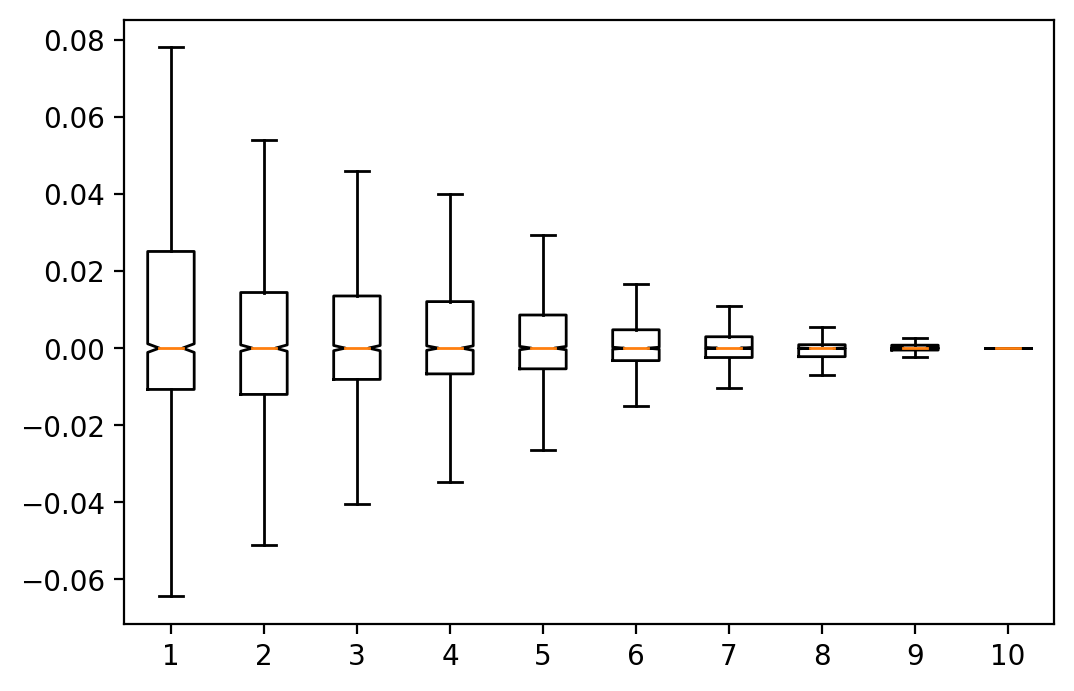

In [80]:
fig, ax = plt.subplots(dpi=200)
ax.boxplot(diffs, vert=True, autorange=True, notch=True, showfliers=False);